# Global Shark Attack

## Anti-Sharkz

## Objective:

#### To find the best markets to sell protective equipment against shark attacks for surfers.

## Importing libs

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


## Reading data from the archive 'GSAF5.xls'

In [3]:
attacks = pd.read_excel('GSAF5.xls')

In [4]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2021.08.13,13-Aug-2021,2021.0,Unprovoked,CANADA,Nova Scotia,Cape Breton Island,Swimming,Taylor Boudreau-Deveaux,F,...,NaN,"J. Marchand, GSAF",2021.08.13-CapeBreton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.08.13,2021.08.13,6692.0,NaN,NaN
1,2021.08.07.c,07-Aug-2021,2021.0,Provoked,AUSTRALIA,Queensland,North Stradbroke Island,Harassing sharks,Rick Manning,M,...,NaN,"J. Marchand and S. De Marchi, GSAF",2021.08.07.c-Manning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.08.07.c,2021.08.07.c,6691.0,NaN,NaN
2,2021.08.07.b,07-Aug-2021,2021.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"J. Marchand, GSAF",2021.08.07.b-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021..08.07.b,2021.08.07.b,6690.0,NaN,NaN
3,2021..08.07.a,07-Aug-2021,2021.0,Unprovoked,USA,Florida,"Key Largo, Monroe County",Snorkeling,male,NaN,...,NaN,"R. B, GSAF",2021.08.07.a-Key-Largo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.08.07.a,2021..08.07.a,6689.0,NaN,NaN
4,2021.08.03,03-Aug-2021,2021.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",NaN,a lifguard,M,...,Blacktip shark,J. Marchand. GSAF,2021.08.03-HiltonHead.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.08.03,2021.08.03,6688.0,NaN,NaN


## Analyzing Data

In [5]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25824 entries, 0 to 25823
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8802 non-null   object 
 1   Date                    6691 non-null   object 
 2   Year                    6689 non-null   float64
 3   Type                    6677 non-null   object 
 4   Country                 6641 non-null   object 
 5   Area                    6220 non-null   object 
 6   Location                6139 non-null   object 
 7   Activity                6123 non-null   object 
 8   Name                    6476 non-null   object 
 9   Sex                     6116 non-null   object 
 10  Age                     3762 non-null   object 
 11  Injury                  6658 non-null   object 
 12  Fatal (Y/N)             6139 non-null   object 
 13  Time                    3239 non-null   object 
 14  Species                 3679 non-null 

In [6]:
attacks.index

RangeIndex(start=0, stop=25824, step=1)

In [7]:
attacks.shape

(25824, 24)

In [8]:
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Counting Missing Values

In [9]:
attacks.isnull().sum()

Case Number               17022
Date                      19133
Year                      19135
Type                      19147
Country                   19183
Area                      19604
Location                  19685
Activity                  19701
Name                      19348
Sex                       19708
Age                       22062
Injury                    19166
Fatal (Y/N)               19685
Time                      22585
Species                   22145
Investigator or Source    19151
pdf                       19134
href formula              19137
href                      19135
Case Number.1             19134
Case Number.2             19134
original order            19133
Unnamed: 22               25823
Unnamed: 23               25822
dtype: int64

## Removing Unnecessary Columns

In [10]:
clean_attacks = attacks.drop(['Unnamed: 22', 'Unnamed: 23', 'Name', 'Case Number', 'Case Number.1', 
                              'Case Number.2', 'pdf', 'href formula', 'href', 'original order', 
                              'Investigator or Source', 'Injury', 'Date', 'Type', 'Sex ', 'Age', 
                             'Fatal (Y/N)', 'Time', 'Species '], axis=1)

clean_attacks

,Year,Country,Area,Location,Activity
0,2021.0,CANADA,Nova Scotia,Cape Breton Island,Swimming
1,2021.0,AUSTRALIA,Queensland,North Stradbroke Island,Harassing sharks
2,2021.0,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
3,2021.0,USA,Florida,"Key Largo, Monroe County",Snorkeling
4,2021.0,USA,South Carolina,"Hilton Head Island, Beaufort County",NaN
...,...,...,...,...,...
25819,NaN,NaN,NaN,NaN,NaN
25820,NaN,NaN,NaN,NaN,NaN
25821,NaN,NaN,NaN,NaN,NaN
25822,NaN,NaN,NaN,NaN,NaN


## Removing NaN Values

In [11]:
clean_attacks.dropna(axis = 0, how = 'all', inplace = True)
clean_attacks

,Year,Country,Area,Location,Activity
0,2021.0,CANADA,Nova Scotia,Cape Breton Island,Swimming
1,2021.0,AUSTRALIA,Queensland,North Stradbroke Island,Harassing sharks
2,2021.0,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
3,2021.0,USA,Florida,"Key Largo, Monroe County",Snorkeling
4,2021.0,USA,South Carolina,"Hilton Head Island, Beaufort County",NaN
...,...,...,...,...,...
6686,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Diving
6687,0.0,AUSTRALIA,Western Australia,NaN,Pearl diving
6688,0.0,USA,North Carolina,Ocracoke Inlet,Swimming
6689,0.0,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN


## Filtering Activity Column by Surfing

In [12]:
surfing_attacks = clean_attacks[(clean_attacks.Activity == 'Surfing')]
surfing_attacks.Country.value_counts().head()

USA             626
AUSTRALIA       223
SOUTH AFRICA     99
BRAZIL           38
REUNION          20
Name: Country, dtype: int64

## Counting Missing Values After Filtering by Surfing

In [13]:
surfing_attacks.isnull().sum()

Year         0
Country      1
Area         6
Location    12
Activity     0
dtype: int64

## Identifying Columns Types

In [14]:
print(surfing_attacks.dtypes)

Year        float64
Country      object
Area         object
Location     object
Activity     object
dtype: object


## Transforming YEAR Values From Float to Integer

In [15]:
surfing_attacks.Year = surfing_attacks.Year.astype(int)

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
print(surfing_attacks.dtypes)

Year         int64
Country     object
Area        object
Location    object
Activity    object
dtype: object


## Eliminating the ACTIVITY Column

In [17]:
surfing_attacks = surfing_attacks.drop(['Activity'], axis=1)
surfing_attacks

,Year,Country,Area,Location
2,2021,USA,Florida,"New Smyrna Beach, Volusia County"
8,2021,USA,Georgia,"Tybee Island, Chatham County"
13,2021,USA,California,"Capitola Beach, Santa Cruz County"
15,2021,AUSTRALIA,Western Australia,Rottnest Island
17,2021,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay
...,...,...,...,...
5617,1922,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle"
5662,1918,AUSTRALIA,New South Wales,Newcastle
6481,1828,USA,Hawaii,"Uo, Lahaina, Maui"
6527,1779,USA,Hawaii,"Maliu, Hawai'i"


## Filtering by YEAR

In [18]:
surfing_attacks = surfing_attacks.loc[surfing_attacks['Year'] >= 1971,:]
surfing_attacks = surfing_attacks.loc[surfing_attacks['Year'] <= 2021,:]

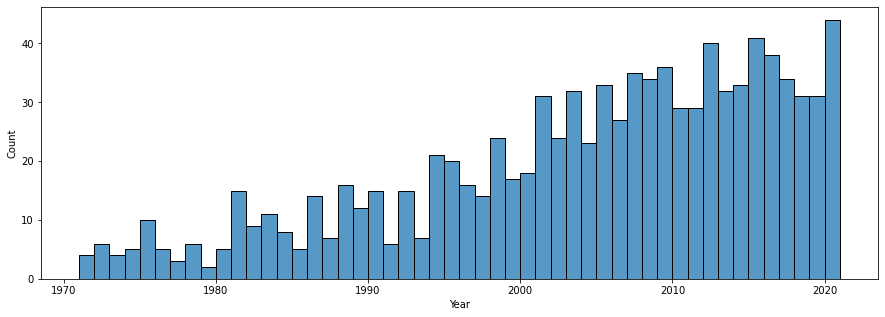

In [79]:
plt.figure(figsize = (15,5))
sns.histplot(data=surfing_attacks, x="Year", bins = 50)
plt.show()

## Filtering and Visualizing the top five Countries

In [75]:
def group(column, threshold):
    table = surfing_attacks[column].value_counts()
    grouped_columns = [i for i in table.index if table[i] < threshold]
    for n in grouped_columns:
        surfing_attacks.loc[surfing_attacks[column] == n, column] = 'Other'

In [78]:
surfing_attacks.drop(surfing_attacks[surfing_attacks['Country'] == 'Other' ].index, inplace = True)

In [76]:
group('Country', 20)

In [77]:
def histogram(column):
    plt.figure(figsize=(15,5))
    grafico = sns.countplot(column,  data = surfing_attacks, order = surfing_attacks[column].value_counts().index)
    grafico.tick_params(axis='x', rotation = 90)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


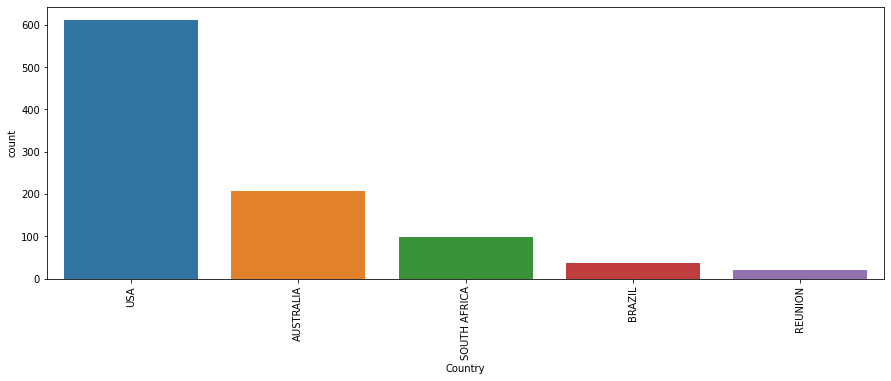

In [72]:
histogram('Country')

## The Top Five Countries in Graphics 

In [25]:
surfing_attacks_USA = surfing_attacks[(surfing_attacks.Country == 'USA')]
surfing_attacks_USA

,Year,Country,Area,Location
2,2021,USA,Florida,"New Smyrna Beach, Volusia County"
8,2021,USA,Georgia,"Tybee Island, Chatham County"
13,2021,USA,California,"Capitola Beach, Santa Cruz County"
26,2021,USA,Florida,"Block Houe Beach, Brevard County"
43,2021,USA,Hawaii,"Marine Corps Base, Oahu"
...,...,...,...,...
3700,1972,USA,California,"Point Sur, Monterey County"
3702,1972,USA,Florida,"Crescent Beach, St. Johns County"
3708,1972,USA,Florida,"Cocoa Beach, Brevard County"
3729,1971,USA,Florida,"Ft. Pierce, St Lucie County"


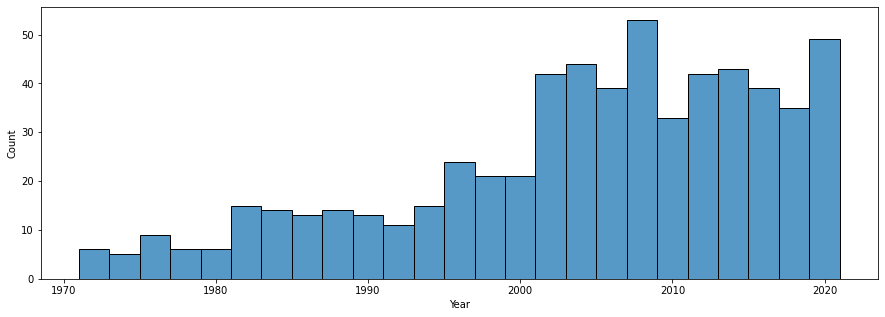

In [26]:
plt.figure(figsize = (15,5))
sns.histplot(data=surfing_attacks_USA, x="Year", bins = 25)
plt.show()

In [27]:
surfing_attacks_AUSTRALIA = surfing_attacks[(surfing_attacks.Country == 'AUSTRALIA')]
surfing_attacks_AUSTRALIA

,Year,Country,Area,Location
15,2021,AUSTRALIA,Western Australia,Rottnest Island
22,2021,AUSTRALIA,New South Wales,Crescent Head
30,2021,AUSTRALIA,Western Australia,Gum Tree Bay
40,2021,AUSTRALIA,New South Wales,Turncurry Beach
86,2020,AUSTRALIA,Western Australia,Cable Beach
...,...,...,...,...
3619,1975,AUSTRALIA,South Australia,Coffin Bay
3675,1973,AUSTRALIA,Queensland,"Point Lookout, Stradbroke Island"
3696,1972,AUSTRALIA,New South Wales,Tabourie Beach
3716,1972,AUSTRALIA,Victoria,"Wilson's Promontory, Waratah Bay"


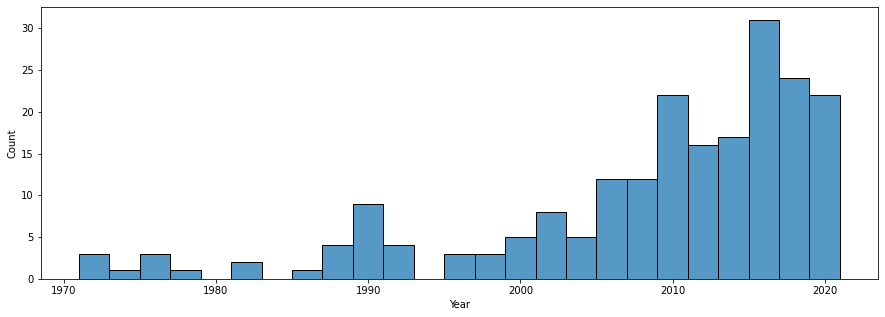

In [28]:
plt.figure(figsize = (15,5))
sns.histplot(data=surfing_attacks_AUSTRALIA, x="Year", bins = 25)
plt.show()

In [29]:
surfing_attacks_S_AFRICA = surfing_attacks[(surfing_attacks.Country == 'SOUTH AFRICA')]
surfing_attacks_S_AFRICA

,Year,Country,Area,Location
17,2021,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay
242,2019,SOUTH AFRICA,Eastern Cape Province,"East Beach, Port Alfred"
377,2018,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London"
397,2018,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay
487,2017,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London"
...,...,...,...,...
3613,1975,SOUTH AFRICA,KwaZulu-Natal,"Inyoni Rocks, Amanzimtoti"
3647,1974,SOUTH AFRICA,KwaZulu-Natal,"Inyoni Rocks, Amanzimtoti"
3648,1974,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti
3687,1973,SOUTH AFRICA,Eastern Cape Province,Queensberry Bay


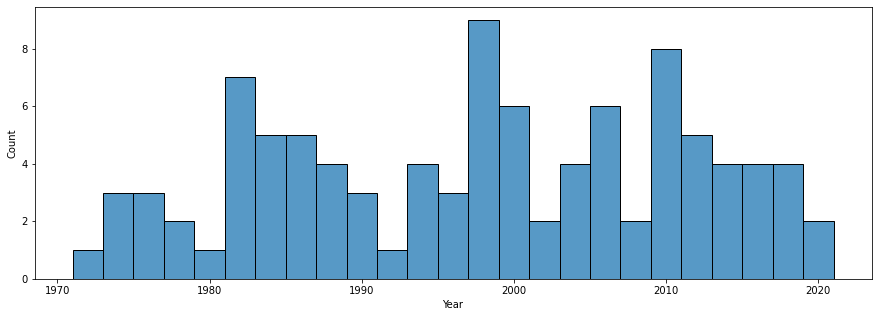

In [30]:
plt.figure(figsize = (15,5))
sns.histplot(data=surfing_attacks_S_AFRICA, x="Year", bins = 25)
plt.show()

In [31]:
surfing_attacks_BRAZIL = surfing_attacks[(surfing_attacks.Country == 'BRAZIL')]
surfing_attacks_BRAZIL

,Year,Country,Area,Location
75,2021,BRAZIL,Pernambuco,Cacimba do Padre Beach
284,2019,BRAZIL,Fernando de Noronha,Cacimba do Padre
414,2018,BRAZIL,Fernando de Noronha,Conceicao Beach
805,2015,BRAZIL,Pernambuco,"Praia del Chifre, Olinda"
1212,2011,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda"
1270,2011,BRAZIL,Pernambuco,Praia do Pina
1414,2010,BRAZIL,Rio Grande Do Sul,"Atlantis Beach, near Tramandai"
1613,2008,BRAZIL,Bahia,Guarajuba
1616,2008,BRAZIL,Pernambuco,"Punta Del Chifre, Olinda"
1848,2006,BRAZIL,Pernambuco,"Boa Viagem Beach, Recife"


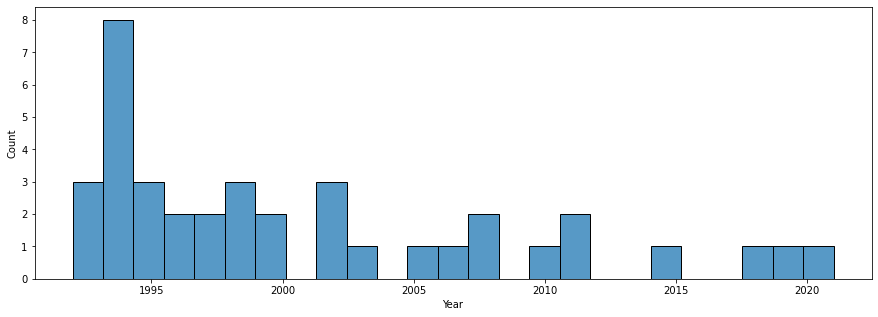

In [32]:
plt.figure(figsize = (15,5))
sns.histplot(data=surfing_attacks_BRAZIL, x="Year", bins = 25)
plt.show()

In [33]:
surfing_attacks_REUNION = surfing_attacks[(surfing_attacks.Country == 'REUNION')]
surfing_attacks_REUNION

,Year,Country,Area,Location
595,2016,REUNION,NaN,Boucan Canot
755,2015,REUNION,NaN,St. Leu
785,2015,REUNION,Le Port,Folette
801,2015,REUNION,Saint-Gilles-les-Bains,Cap Homard
894,2014,REUNION,Saint-Leu,NaN
1122,2012,REUNION,Saint Leu,NaN
1129,2012,REUNION,Trois-Bassins,NaN
1267,2011,REUNION,Saint-Gilles,Roches Noires
1311,2011,REUNION,Saint Gilles,Trois-Roches
1402,2010,REUNION,Saint-Benoit,Bittern


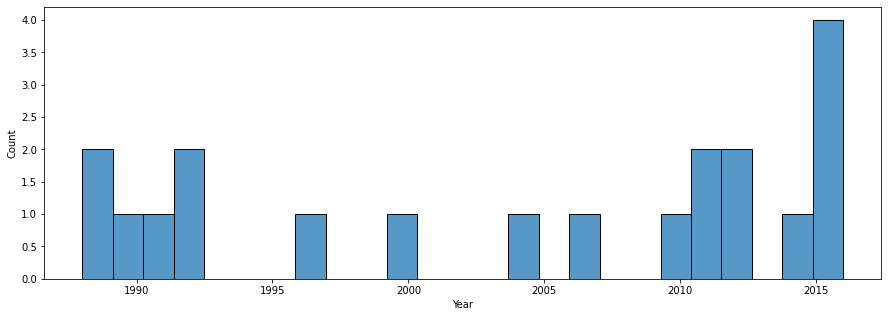

In [34]:
plt.figure(figsize = (15,5))
sns.histplot(data=surfing_attacks_REUNION, x="Year", bins = 25)
plt.show()

## Conclusions

- After analyzing the history of shark attacks against surfers around the world, we could identify that the 5 countries with the highest number of shark attacks are: USA, AUSTRALIA, SOUTH AFRICA, BRAZIL and REUNION.
- Since the beginning of the analysis, USA has been the country with the biggest number of shark attacks. And we can see in the corresponding chart that the number of attacks has increased significantly in the latter half of the latest 50 years, similar to what we can see in Australia.
- Brazil, despite being in the fourth position in the ranking, had a significant drop in the amount of attacks per year after 1994.

    #### Looking at the data above, we can consider USA and AUSTRALIA as the best markets to focus our commercial efforts, while Brazil does not show a favorable trend for the foreseeable future.